# Predictive Modeling


## Merging, cleaning datasets

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn import metrics
%matplotlib inline

In [2]:
#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

In [4]:
#merging splash with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])

In [5]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

In [6]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head(n = 3)
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)

In [7]:

import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data preprocessing for modeling

In [8]:
# Finding Correlated Features
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419589
MKHOURSEMH            0.403368
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
WDWMAXTEMP            0.334935
EP09CAPACITY          0.323179
HSFIREWK              0.301307
YEAR                  0.297048
WDWMEANTEMP           0.284476
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.228848
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

In [9]:
golden_list_2 = golden_features_list_2.to_frame()
golden_list_2 = golden_list_2.reset_index()
golden_list_2 # = pd.DataFrame(golden_list,columns=['VARIABLES','SPOSTMIN'])
golden_list_2 = golden_list_2.iloc[:,0]
golden_list_2 = golden_list_2.tolist()
golden_list_2.remove('SPOSTMIN')

We will use these 41 highly correlated features for modeling.

In [10]:
np.random.seed(5)

# Splitting Dataset between dependent & independent variables
x = meta_splash2[golden_list_2]
y = meta_splash2['SPOSTMIN']

#75% training & 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

Next we'll split our training and testing sets. The training set will contain 75 percent of the dataset and the testing set will get the remaining 25%

In [11]:
## ln transforming y test and y train to reduce variability
y_train = np.log(y_train)
y_test = np.log(y_test)

Lastly, we'll log our outcome variable to reduce variability.

In [12]:
print('Number of observations:', x.shape[0])
print('Number of predictors:', x.shape[1])


Number of observations: 2381
Number of predictors: 41


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
# Make Prediction on test set
y_predlm= lm.predict(x_test)


In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predlm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predlm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlm)))

# Caculating Error
errors = round(metrics.mean_absolute_error(y_test, y_predlm),2)
#mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_linear = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_linear, 2), '%')


Mean Absolute Error: 0.2819824670049207
Mean Squared Error: 0.14229757957031058
Root Mean Squared Error: 0.3772235140739646
Accuracy: 91.82 %


## Ridge Regression


In [15]:
from sklearn.linear_model import Ridge

In [16]:
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
y_pred_ridge = ridgeReg.predict(x_test)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))


# Caculating Error
errors = round(metrics.mean_absolute_error(y_test, y_pred_ridge),2)
#mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_ridge = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_ridge, 2), '%')


Mean Absolute Error: 0.2902093509613214
Mean Squared Error: 0.14724094679103195
Root Mean Squared Error: 0.38371988063043067
Accuracy: 91.53 %


## Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
# Training Lasso Model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
y_pred_lasso = lassoReg.predict(x_test)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_lasso),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_lasso = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_lasso, 2), '%.')



Mean Absolute Error: 0.4731872458793982
Mean Squared Error: 0.357531222024162
Root Mean Squared Error: 0.5979391457532798
Accuracy: 86.28 %.


## Elastic Net Regression

In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
# Training Elastic Net Regression Model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
y_pred_en = ENreg.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_en))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_en))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_en),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_en = (100 - np.mean(mape)).round(2,)
print('Root Mean Square Deviation:', round(acc_en, 2), '%.')

Mean Absolute Error: 0.36541802067759316
Mean Squared Error: 0.23152371413701534
Root Mean Squared Error: 0.48116911178609056
Root Mean Square Deviation: 89.2 %.


Out of all three OLS techniques, Linear Regression was the best in terms of relative MSE and MSE.

# Let's see if an ensemble method would work better!

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)
#train the model using the traing set
dt = rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_rf),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_rf = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_rf, 2), '%.')

Mean Absolute Error: 0.22124819412523797
Mean Squared Error: 0.09392833825225533
Root Mean Squared Error: 0.30647730462834494
Accuracy: 93.58 %.


Wow! Our random forest model does significantly better than any of our OLS modeling methods.

# Predicting Summer Months


## Ridge Regression

In [26]:
# Subsetting only summer months

summer_df = meta_splash2[(meta_splash2.MONTHOFYEAR == 5) | (meta_splash2.MONTHOFYEAR == 6)|
                        (meta_splash2.MONTHOFYEAR == 7)|(meta_splash2.MONTHOFYEAR == 8)|
                        (meta_splash2.MONTHOFYEAR == 9)]
summer2018_df = summer_df[summer_df.YEAR == 2018]
summer2018_df
actual_time = summer2018_df.iloc[:,0:2]
actual_time.index = range(153)
summer2018_dates = summer2018_df.iloc[:,0:1]

In [27]:
#Test rf on summer 2018
predict_time_df = summer2018_df[golden_list_2]
predict_time_df

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
y_pred_df = ridgeReg.predict(predict_time_df)



In [28]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

ridge_pred_df = pd.DataFrame(y_pred_df)
ridge_pred_df.head(n = 6)

ridge_comparison_df = pd.concat([actual_time,ridge_pred_df],
                              axis = 1)
ridge_comparison_df = ridge_comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)
ridge_comparison_df.Predicted_Time = np.exp(ridge_comparison_df.Predicted_Time)
ridge_comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-05-01,37.875000,45.188599
1,2018-05-02,45.781250,54.627307
2,2018-05-03,38.911290,52.527026
3,2018-05-04,60.344828,60.337246
4,2018-05-05,38.885135,59.473237
5,2018-05-06,30.538462,45.868718
6,2018-05-07,72.830189,64.415153
7,2018-05-08,52.552083,49.522016
8,2018-05-09,18.000000,58.790424
9,2018-05-10,41.666667,56.602247


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


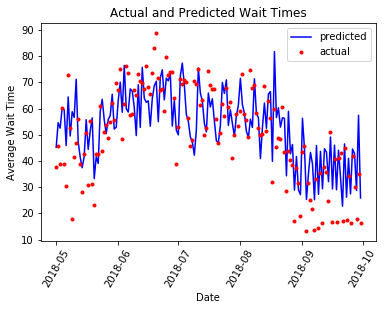

In [29]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

plt.plot(ridge_comparison_df.Date, ridge_comparison_df.Predicted_Time,'b-', label = 'predicted')

plt.plot(ridge_comparison_df.Date, ridge_comparison_df.Actual_Time,'ro', label = 'actual',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times');


## Random Forest

In [30]:
# Subsetting only summer months

summer_df = meta_splash2[(meta_splash2.MONTHOFYEAR == 5) | (meta_splash2.MONTHOFYEAR == 6)|
                        (meta_splash2.MONTHOFYEAR == 7)|(meta_splash2.MONTHOFYEAR == 8)|
                        (meta_splash2.MONTHOFYEAR == 9)]
summer2018_df = summer_df[summer_df.YEAR == 2018]
summer2018_df
actual_time = summer2018_df.iloc[:,0:2]
actual_time.index = range(153)
summer2018_dates = summer2018_df.iloc[:,0:1]

In [31]:
#Test rf on summer 2018
predict_time_df = summer2018_df[golden_list_2]
predict_time_df

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

predicted_time = rf.predict(predict_time_df)

In [32]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

predicted_time_df = pd.DataFrame(predicted_time)
predicted_time_df.head(n = 6)

comparison_df = pd.concat([actual_time,predicted_time_df],
                              axis = 1)
comparison_df = comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)
comparison_df.Predicted_Time = np.exp(comparison_df.Predicted_Time)
comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-05-01,37.875000,39.521006
1,2018-05-02,45.781250,43.968841
2,2018-05-03,38.911290,40.823528
3,2018-05-04,60.344828,56.850789
4,2018-05-05,38.885135,53.176875
5,2018-05-06,30.538462,32.205314
6,2018-05-07,72.830189,42.254742
7,2018-05-08,52.552083,36.350887
8,2018-05-09,18.000000,26.932939
9,2018-05-10,41.666667,41.737715


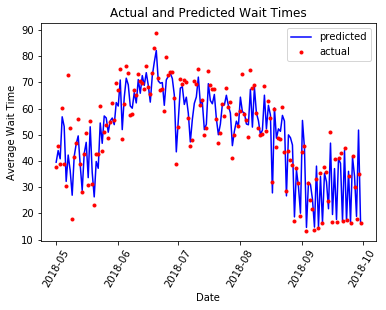

In [33]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'b-', label = 'predicted')

plt.plot(comparison_df.Date, comparison_df.Actual_Time,'ro', label = 'actual',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times');


# Compare Prediction to Actual Wait Time July 2018

## Random Forest

In [34]:
july_df = meta_splash2[meta_splash2.MONTHOFYEAR == 7]
july2018_df = july_df[july_df.YEAR == 2018]
july2018_df
actual_time = july2018_df.iloc[:,0:2]
actual_time.index = range(31)

In [35]:
#Test rf on july 2018
predict_time_df = july2018_df[golden_list_2]
predict_time_df

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

predicted_time = rf.predict(predict_time_df)

In [36]:
predicted_time_df = pd.DataFrame(predicted_time)
predicted_time_df.head(n = 6)

comparison_df = pd.concat([actual_time,predicted_time_df],
                              axis = 1)
comparison_df = comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)

comparison_df.Predicted_Time = np.exp(comparison_df.Predicted_Time)

comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-07-01,52.796610,54.644032
1,2018-07-02,71.344086,68.166221
2,2018-07-03,69.210526,69.457659
3,2018-07-04,70.887097,62.280540
4,2018-07-05,70.275591,62.498996
5,2018-07-06,56.296296,56.404215
6,2018-07-07,45.625000,50.572239
7,2018-07-08,47.892157,56.028470
8,2018-07-09,70.595238,62.708411
9,2018-07-10,69.205607,64.827416


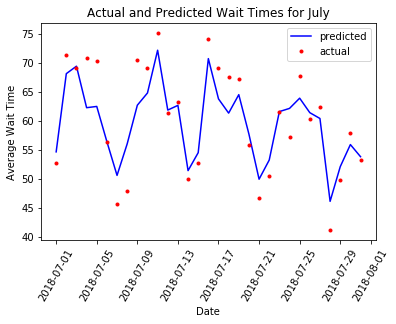

In [37]:
plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'b-', label = 'predicted')

plt.plot(comparison_df.Date, comparison_df.Actual_Time,'ro', label = 'actual',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times for July');


In [38]:
mse_lm = metrics.mean_squared_error(y_test, y_predlm)

mse_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
mse_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
mse_en = metrics.mean_squared_error(y_test, y_pred_en)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)

In [39]:
# Creating new dataframe with accuracy and MSE

mse = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Elastic", "Random Forest"],
    "Relative MSE": [acc_linear, acc_ridge, acc_lasso, acc_en, acc_rf],
    "MSE": [mse_lm.round(4,), mse_ridge.round(4,), mse_lasso.round(4,), mse_en.round(4,), mse_rf.round(4,)]})

mse

,Model,Relative MSE,MSE
0,Linear,91.82,0.1423
1,Ridge,91.53,0.1472
2,Lasso,86.28,0.3575
3,Elastic,89.20,0.2315
4,Random Forest,93.58,0.0939


# Next Steps
Due to deficiencies in the data, we eliminated the actual wait times for each ride. Chasing out these data points or creating a weighting system for actual wait time data points available could provide a more accurate wait time set to analyze. This could explain the larger gaps in accuracy when defining our model for predicting wait times. However, more problems could arise due to the lack of actual wait times that cause the posted wait time data to have more noise than our results currently display.


# Conclusion
After testing all models and analyzing each error set, we determined Random Forests to be the best model for determining wait times for the summer. Random Forests contained the lowest of the 5 models tested with a 93.20% predictive accuracy and 0.109323 Mean Squared Error, thus providing us with the closest predictions from the actual wait times to the predicted. The Ordinary Least Squares model was not as precise as the Random Forest model
